In [42]:
# Analysing Premarket watch excel file and building a Strategy

In [43]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
#!pip install talib as ta
#!pip install math

In [79]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib

In [45]:
#df1=pd.read_csv('D:\\Python\\Abishek Bhanushali\\Nifty500 list\\ind_nifty500list.csv')
#df1

In [46]:
#df1.count()

In [47]:
#!pip install yfinance

In [48]:
import yfinance as yf

In [49]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("^NSEBANK", period ="7d", interval="15m")

[*********************100%***********************]  1 of 1 completed


In [50]:
#df

In [51]:
#Writing a strategy to code to generate a buy and sell signal as per guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal


In [52]:
# Extraction values of SMA 3 and SMA 8 

In [53]:
# Considering only closing values for predicting trend
Close = df["Close"]

In [54]:
# Checking the datatype of Close
print(type(Close))

<class 'pandas.core.series.Series'>


In [55]:
# Extracting 3 sma using talib library
sma3 = talib.SMA(Close, timeperiod = 3)

In [56]:
# Printing sma8
sma3

Datetime
2021-05-21 09:15:00+05:30             NaN
2021-05-21 09:30:00+05:30             NaN
2021-05-21 09:45:00+05:30    33889.200521
2021-05-21 10:00:00+05:30    33937.466146
2021-05-21 10:15:00+05:30    33977.632812
                                 ...     
2021-05-31 14:15:00+05:30    35451.483073
2021-05-31 14:30:00+05:30    35465.483073
2021-05-31 14:45:00+05:30    35445.250000
2021-05-31 15:00:00+05:30    35474.716146
2021-05-31 15:15:00+05:30    35490.833333
Length: 175, dtype: float64

In [57]:
# Extracting 8 sma using talib library
sma8 = talib.SMA(Close, timeperiod = 8)

In [58]:
# Printing sma8 
sma8

Datetime
2021-05-21 09:15:00+05:30             NaN
2021-05-21 09:30:00+05:30             NaN
2021-05-21 09:45:00+05:30             NaN
2021-05-21 10:00:00+05:30             NaN
2021-05-21 10:15:00+05:30             NaN
                                 ...     
2021-05-31 14:15:00+05:30    35423.993652
2021-05-31 14:30:00+05:30    35428.824707
2021-05-31 14:45:00+05:30    35425.787109
2021-05-31 15:00:00+05:30    35442.456055
2021-05-31 15:15:00+05:30    35456.118652
Length: 175, dtype: float64

In [59]:
# Checking the datatype of sma8
print(type(sma8))

<class 'pandas.core.series.Series'>


In [60]:
# Creating a new column by incorporating the difference between SMA3 and SMA8
df["sma3"] = sma3
df["sma8"] = sma8

In [61]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-21 09:15:00+05:30,33559.800781,33803.351562,33559.800781,33798.351562,33798.351562,0,NaN,NaN
2021-05-21 09:30:00+05:30,33801.851562,33911.898438,33799.148438,33908.750000,33908.750000,0,NaN,NaN
2021-05-21 09:45:00+05:30,33907.148438,33999.199219,33907.148438,33960.500000,33960.500000,0,33889.200521,NaN
2021-05-21 10:00:00+05:30,33959.351562,34025.949219,33917.949219,33943.148438,33943.148438,0,33937.466146,NaN
2021-05-21 10:15:00+05:30,33943.898438,34045.199219,33942.050781,34029.250000,34029.250000,0,33977.632812,NaN
...,...,...,...,...,...,...,...,...
2021-05-31 14:15:00+05:30,35490.351562,35503.500000,35432.449219,35471.351562,35471.351562,0,35451.483073,35423.993652
2021-05-31 14:30:00+05:30,35469.148438,35486.000000,35401.550781,35436.199219,35436.199219,0,35465.483073,35428.824707
2021-05-31 14:45:00+05:30,35433.500000,35459.550781,35407.601562,35428.199219,35428.199219,0,35445.250000,35425.787109


In [62]:
# Filling NAN vales backwards for Dataframe
df =df.fillna( method = "bfill")

In [63]:
# Printing dataframe after filling missing/nan values
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-21 09:15:00+05:30,33559.800781,33803.351562,33559.800781,33798.351562,33798.351562,0,33889.200521,33982.968262
2021-05-21 09:30:00+05:30,33801.851562,33911.898438,33799.148438,33908.750000,33908.750000,0,33889.200521,33982.968262
2021-05-21 09:45:00+05:30,33907.148438,33999.199219,33907.148438,33960.500000,33960.500000,0,33889.200521,33982.968262
2021-05-21 10:00:00+05:30,33959.351562,34025.949219,33917.949219,33943.148438,33943.148438,0,33937.466146,33982.968262
2021-05-21 10:15:00+05:30,33943.898438,34045.199219,33942.050781,34029.250000,34029.250000,0,33977.632812,33982.968262
...,...,...,...,...,...,...,...,...
2021-05-31 14:15:00+05:30,35490.351562,35503.500000,35432.449219,35471.351562,35471.351562,0,35451.483073,35423.993652
2021-05-31 14:30:00+05:30,35469.148438,35486.000000,35401.550781,35436.199219,35436.199219,0,35465.483073,35428.824707
2021-05-31 14:45:00+05:30,35433.500000,35459.550781,35407.601562,35428.199219,35428.199219,0,35445.250000,35425.787109


Text(0.5, 1.0, 'Close Price of SMA3 and SMA8  ')

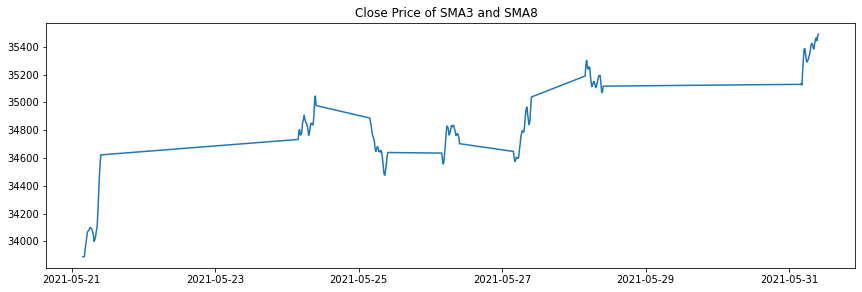

In [64]:
plt.figure(figsize=(14.5,4.5))
plt.plot(df['sma3'], label  ='sma3 & sma8')
plt.title('Close Price of SMA3 and SMA8  ')
#plt.figsave("20 Diff.png")

In [65]:
# Check when 3 sma if greater than or less than 8sma, print a buy signal or else print a sell signal.

In [66]:
# Check Atr value 
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-21 09:15:00+05:30,33559.800781,33803.351562,33559.800781,33798.351562,33798.351562,0,33889.200521,33982.968262
2021-05-21 09:30:00+05:30,33801.851562,33911.898438,33799.148438,33908.750000,33908.750000,0,33889.200521,33982.968262
2021-05-21 09:45:00+05:30,33907.148438,33999.199219,33907.148438,33960.500000,33960.500000,0,33889.200521,33982.968262
2021-05-21 10:00:00+05:30,33959.351562,34025.949219,33917.949219,33943.148438,33943.148438,0,33937.466146,33982.968262
2021-05-21 10:15:00+05:30,33943.898438,34045.199219,33942.050781,34029.250000,34029.250000,0,33977.632812,33982.968262
...,...,...,...,...,...,...,...,...
2021-05-31 14:15:00+05:30,35490.351562,35503.500000,35432.449219,35471.351562,35471.351562,0,35451.483073,35423.993652
2021-05-31 14:30:00+05:30,35469.148438,35486.000000,35401.550781,35436.199219,35436.199219,0,35465.483073,35428.824707
2021-05-31 14:45:00+05:30,35433.500000,35459.550781,35407.601562,35428.199219,35428.199219,0,35445.250000,35425.787109


In [75]:
df["Diff"] = sma3-sma8


In [76]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff
Datetime,,,,,,,,,
2021-05-21 09:15:00+05:30,33559.800781,33803.351562,33559.800781,33798.351562,33798.351562,0,33889.200521,33982.968262,NaN
2021-05-21 09:30:00+05:30,33801.851562,33911.898438,33799.148438,33908.750000,33908.750000,0,33889.200521,33982.968262,NaN
2021-05-21 09:45:00+05:30,33907.148438,33999.199219,33907.148438,33960.500000,33960.500000,0,33889.200521,33982.968262,NaN
2021-05-21 10:00:00+05:30,33959.351562,34025.949219,33917.949219,33943.148438,33943.148438,0,33937.466146,33982.968262,NaN
2021-05-21 10:15:00+05:30,33943.898438,34045.199219,33942.050781,34029.250000,34029.250000,0,33977.632812,33982.968262,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-31 14:15:00+05:30,35490.351562,35503.500000,35432.449219,35471.351562,35471.351562,0,35451.483073,35423.993652,27.489421
2021-05-31 14:30:00+05:30,35469.148438,35486.000000,35401.550781,35436.199219,35436.199219,0,35465.483073,35428.824707,36.658366
2021-05-31 14:45:00+05:30,35433.500000,35459.550781,35407.601562,35428.199219,35428.199219,0,35445.250000,35425.787109,19.462891


In [91]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.0,175.000000,175.000000,168.000000
mean,34809.102679,34866.421629,34758.592388,34816.998237,34816.998237,0.0,34808.047567,34788.194289,21.963906
std,397.330371,392.521523,392.905033,387.634030,387.634030,0.0,386.253406,381.043829,74.790542
min,33559.800781,33803.351562,33559.800781,33798.351562,33798.351562,0.0,33889.200521,33982.968262,-122.696452
25%,34624.525391,34681.675781,34585.150391,34631.525391,34631.525391,0.0,34636.342448,34628.714844,-26.408000
50%,34816.398438,34860.449219,34754.550781,34818.398438,34818.398438,0.0,34806.316406,34808.962402,12.295654
75%,35111.275391,35175.150391,35071.175781,35126.599609,35126.599609,0.0,35121.349609,35125.799805,54.438436
max,35562.750000,35582.351562,35481.101562,35559.750000,35559.750000,0.0,35490.833333,35456.118652,259.939616


Text(0.5, 1.0, 'SMA3 - SMA8 Values')

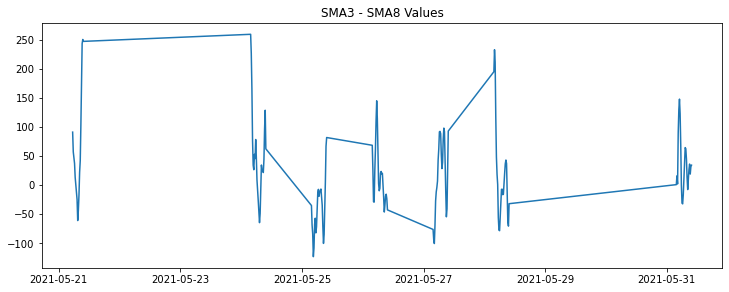

In [81]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Diff'], label  ='Diff Values')
plt.title('SMA3 - SMA8 Values')

In [93]:
# Using a for loop to compare 3sma with 8sma and generating a signal.
postition =0
#position = int
for i in range(len(df)):
    if -53 < df["sma3"][i] - df["sma8"][i] > 95:  # The value should be considered with ATR (7) Inicator.
        #print(" Buy Signal")
        print("Buy Entry Price", df["Close"][i])
        print("Exit Price Target", df["Close"][i] +100 )
        print("Exit Price Stoploss", df["Close"][i]-50)
        
        print("**********************")
        #print("Datetime", df["Datetime"])
    else:
        #print('Sell signal')
        print("Sell Entry Price", df["Close"][i])
        print("Exit  Price Target", df["Close"][i] -100 )
        print("Exit Price Stoploss", df["Close"][i] + 50)
        print("**********************")
       

Sell Entry Price 33798.3515625
Exit  Price Target 33698.3515625
Exit Price Stoploss 33848.3515625
**********************
Sell Entry Price 33908.75
Exit  Price Target 33808.75
Exit Price Stoploss 33958.75
**********************
Sell Entry Price 33960.5
Exit  Price Target 33860.5
Exit Price Stoploss 34010.5
**********************
Sell Entry Price 33943.1484375
Exit  Price Target 33843.1484375
Exit Price Stoploss 33993.1484375
**********************
Sell Entry Price 34029.25
Exit  Price Target 33929.25
Exit Price Stoploss 34079.25
**********************
Sell Entry Price 34087.8984375
Exit  Price Target 33987.8984375
Exit Price Stoploss 34137.8984375
**********************
Sell Entry Price 34069.94921875
Exit  Price Target 33969.94921875
Exit Price Stoploss 34119.94921875
**********************
Sell Entry Price 34065.8984375
Exit  Price Target 33965.8984375
Exit Price Stoploss 34115.8984375
**********************
Sell Entry Price 34097.8984375
Exit  Price Target 33997.8984375
Exit Price St